# A notebook with the FRB/US model
This notebook is based on the the FRB/US model packages located here (https://www.federalreserve.gov/econres/us-models-package.htm). The packages provides an Eviews (https://www.eviews.com/) implementation. The Eviews modelspecification has been transformed to ModelFlow BusinessLogic specification. 

FRB/US comes in two flawors: **VAR** in which expectaions are generated by backward looking equations, and **MCE** in which expectation are based on leaded values.

This notebook implement the **MCE** flavour. The presence of leaded variable implies that the model has to be solved for all quarters in one go. The **VAR** model which has only lagged variables can be solved for each quarter in turn. 

The tool used is highly experimental and the results are purely for illustration. 

You can run each cell by pressing the run tool or shift+enter
To run all cells use select cell/run all in the menu bar. 
You ca run each cell by pressing the run tool or shift+enter

# Import stuff

In [1]:
import pandas as pd

from modelclass import model
import modelmf
#model.modelflow_auto()

# Load the model and a baseline databank

In [2]:
mfrbusmce,basedf = model.modelload('models/frbus_mce.pcim')

# Run the baseline 

In [3]:
baseres = mfrbusmce(basedf,'2021q2','2060q4', silent=1,ljit=0,stringjit=0,forcenum=0)

# Make a number of experiments, and run them 

In [4]:
mfrbusmce.keep_solutions = {}
for shock in [0.0, 0.5, 1.0, 1.5, 2.0,-0.5,-1,-1.5,-2.0]:
    altdf = baseres.copy()
    # Update variables in the dataframe
    altdf.loc['2021q4','RFFINTAY_AERR'] = altdf.loc['2021q4','RFFINTAY_AERR']+ shock
    altdf['RFFMIN']        = 0 
    altdf['DMPTR'] = 0   
    with model.timer(f'newton all periods,shock = {shock:7} '):
        altres = mfrbusmce(altdf,keep=f'Shock={shock}',silent=1,nonlin=6,newton_reset=0)


newton all periods,shock =     0.0  took       :         9.167 Seconds
newton all periods,shock =     0.5  took       :         9.446 Seconds
newton all periods,shock =     1.0  took       :         9.449 Seconds
newton all periods,shock =     1.5  took       :         9.430 Seconds
newton all periods,shock =     2.0  took       :         9.429 Seconds
newton all periods,shock =    -0.5  took       :         9.523 Seconds
newton all periods,shock =      -1  took       :         9.455 Seconds
newton all periods,shock =    -1.5  took       :         9.350 Seconds
newton all periods,shock =    -2.0  took       :         9.315 Seconds


# Display results 
## Levels

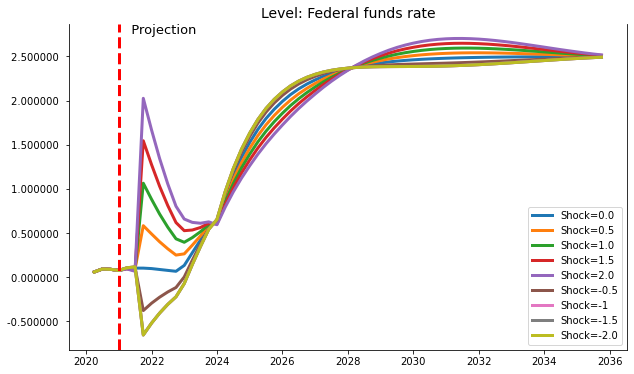

In [9]:
mfrbusmce.keep_plot('RFF','2020q2','2035q4',legend=1);

## Differences to baseline (first run)

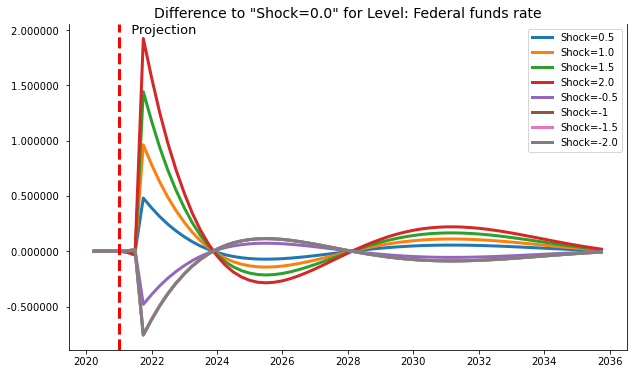

In [8]:
mfrbusmce.keep_plot('RFF','2020q2','2035q4',diff=True,legend=1);

# Display results interactive 

In [7]:
mfrbusmce.vline = [('2021q1','   Projection')]
mfrbusmce.keep_viz('RFF')

Output()